# PYTHON CREDIT CARD CASE STUDY - shubhamjainxyz@gmail.com

## IMPORTING LIBRARIES

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [155]:
path = 'C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FINAL/1. Predicting Credit Card Spend & Identifying Key Drivers/'

### SETTING DISPLAY OPTIONS

In [156]:
pd.set_option('display.max_columns', 175)
pd.set_option('display.max_rows', 175)
pd.set_option('display.max_info_columns', 175)

## IMPORTING DATASET

In [157]:
credit_data = pd.read_excel(path + 'Data Set.xlsx')

In [158]:
credit_data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,employ,empcat,retire,income,lninc,inccat,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,default,jobsat,marital,spoused,spousedcat,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,homeown,hometype,address,addresscat,cars,carown,cartype,carvalue,carcatvalue,carbought,carbuy,commute,commutecat,commutetime,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polview,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenure,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenure,card2tenurecat,cardspent,card2spent,active,bfast,tenure,churn,longmon,lnlongmon,longten,lnlongten,tollfree,tollmon,lntollmon,tollten,lntollten,equip,equipmon,lnequipmon,equipten,lnequipten,callcard,cardmon,lncardmon,cardten,lncardten,wireless,wiremon,lnwiremon,wireten,lnwireten,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,hourstv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,1,0,1,0,31,3.433987,2,11.1,1.200909,0.183079,2.240091,0.806516,1,1,0,-1,-1,3,0,0,0,0,0,0,0,0,0,2,0,1,2,1,0,14.3,1,0,0,8,4,22.0,0,1,1,0,0,0,0,1,0,0,9,6,1,0,1,3,1,1,0,2,2,5,3,1,0,3,2,81.66,67.80,0,3,5,1,6.50,1.871802,34.40,3.538057,1,29.0,3.367296,161.05,5.081715,1,29.50,3.384390,126.1,4.837075,1,14.25,2.656757,60.0,4.094345,0,0.00,NaN,0.00,NaN,1,1,1,0,0,1,1,1,0,1,13,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,0,0,1,0,15,2.708050,1,18.6,1.222020,0.200505,1.567980,0.449788,1,1,0,-1,-1,2,6,0,0,0,0,0,0,6,1,3,2,1,2,1,1,6.8,1,0,0,1,1,29.0,1,0,0,1,0,0,1,0,1,1,9,4,1,0,0,2,4,1,0,4,2,4,1,3,0,4,2,42.60,34.94,1,1,39,0,8.90,2.186051,330.60,5.800909,0,0.0,NaN,0.00,NaN,1,54.85,4.004602,1975.0,7.588324,1,16.00,2.772589,610.0,6.413459,1,45.65,3.821004,1683.55,7.428660,1,1,1,4,1,0,1,0,1,1,18,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,0,16,5,0,35,3.555348,2,9.9,0.928620,-0.074056,2.536380,0.930738,0,4,1,13,2,3,3,2,1,0,0,0,0,0,1,1,30,5,3,1,1,18.8,1,0,1,4,3,24.0,1,0,1,1,1,0,0,0,0,0,2,5,1,0,0,2,1,4,0,35,5,4,1,3,0,25,5,184.22,175.75,0,3,65,0,28.40,3.346389,1858.35,7.527444,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,23.00,3.135494,1410.0,7.251345,0,0.00,NaN,0.00,NaN,1,0,0,0,0,0,0,0,0,1,21,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,0,0,1,0,20,2.995732,1,5.7,0.022800,-3.780995,1.117200,0.110826,1,2,1,18,4,5,0,0,0,0,0,0,0,0,1,3,3,2,3,1,1,8.7,1,0,1,1,1,38.0,1,0,0,0,0,0,0,0,0,0,9,3,0,0,0,2,1,4,0,5,2,3,2,4,0,5,2,340.99,18.42,1,1,36,0,6.00,1.791759,199.45,5.295564,0,0.0,NaN,0.00,NaN,0,0.00,NaN,0.0,NaN,1,21.00,3.044522,685.0,6.529419,0,0.00,NaN,0.00,NaN,1,0,0,2,0,0,0,0,1,1,26,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,0,1,1,0,23,3.135494,1,1.7,0.214659,-1.538705,0.176341,-1.735336,0,1,1,13,2,4,0,0,0,0,0,0,0,0,0,2,3,2,1,0,1,10.6,1,0,1,6,3,32.0,0,0,0,0,0,1,0,1,0,0,9,4,0,0,0,4,2,1,0,8,3,1,3,2,0,9,3,255.10,252.73,1,3,21,0,3.05,1.115142,74.10,4.305416,1,16.5,2.803360,387.70,5.960232,0,0.00,NaN,0.0,NaN,1,17.25,2.847812,360.0,5.886104,1,19.05,2.947067,410.80,6.018106,0,1,0,3,1,1,1,1,0,1,27,1,1,1,0,1,0,1,0,0,0,1,0


In [159]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 130 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   custid             5000 non-null   object 
 1   region             5000 non-null   int64  
 2   townsize           4998 non-null   float64
 3   gender             5000 non-null   int64  
 4   age                5000 non-null   int64  
 5   agecat             5000 non-null   int64  
 6   birthmonth         5000 non-null   object 
 7   ed                 5000 non-null   int64  
 8   edcat              5000 non-null   int64  
 9   jobcat             5000 non-null   int64  
 10  union              5000 non-null   int64  
 11  employ             5000 non-null   int64  
 12  empcat             5000 non-null   int64  
 13  retire             5000 non-null   int64  
 14  income             5000 non-null   int64  
 15  lninc              5000 non-null   float64
 16  inccat             5000

In [160]:
credit_data.nunique()

custid               5000
region                  5
townsize                5
gender                  2
age                    62
agecat                  5
birthmonth             12
ed                     18
edcat                   5
jobcat                  6
union                   2
employ                 52
empcat                  5
retire                  2
income                266
lninc                 266
inccat                  5
debtinc               325
creddebt             4950
lncreddebt           4941
othdebt              4973
lnothdebt            4972
default                 2
jobsat                  5
marital                 2
spoused                22
spousedcat              6
reside                  9
pets                   20
pets_cats               7
pets_dogs               7
pets_birds              6
pets_reptiles           7
pets_small              8
pets_saltfish           9
pets_freshfish         17
homeown                 2
hometype                4
address     

### CORRECTING THE DATATYPES OF FEATURES

In [161]:
# CONVERTING ORDINAL/NOMINAL CATEGORICAL AND BINOMIAL CATEGORICAL VARIABLES TO OBJECT TYPE
credit_data.loc[ :, credit_data.nunique() <= 6] = credit_data.loc[ :, credit_data.nunique() <= 6].astype('object')

In [162]:
credit_data.loc[ :, 'pets_birds'] = credit_data.loc[ :, 'pets_birds'].astype('int64') 

In [163]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 130 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   custid             5000 non-null   object 
 1   region             5000 non-null   object 
 2   townsize           4998 non-null   object 
 3   gender             5000 non-null   object 
 4   age                5000 non-null   int64  
 5   agecat             5000 non-null   object 
 6   birthmonth         5000 non-null   object 
 7   ed                 5000 non-null   int64  
 8   edcat              5000 non-null   object 
 9   jobcat             5000 non-null   object 
 10  union              5000 non-null   object 
 11  employ             5000 non-null   int64  
 12  empcat             5000 non-null   object 
 13  retire             5000 non-null   object 
 14  income             5000 non-null   int64  
 15  lninc              5000 non-null   float64
 16  inccat             5000

### CREATING UDF's TO PERFORM EXPLORATORY  DATA  ANALYSIS AND DATA PREPARATION

In [164]:
# UDF TO CREATE UNIVARIATE ANALYSIS FOR NUMERICAL FEATURES
def continuous_var_summary(x) :
    
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(), x.std(), x.var(), 
                      x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.1), x.quantile(0.25), 
                      x.quantile(0.5), x.quantile(0.75), x.quantile(0.9), x.quantile(0.95), x.quantile(0.99), x.max()],
                      index = ['N', 'NMISS', 'TOTAL SUM', 'MEAN', 'MEDIAN', 'STDEV', 'VAR', 'MIN', 'P1', 'P5', 'P10', 'P25',
                               'P50', 'P75', 'P90', 'P95', 'P99', 'MAX'])

In [165]:
# UDF TO CREATE UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES
def categorical_var_summary(x) :
    
    mode = x.value_counts().sort_values(ascending = False).iloc[0:1, ].reset_index()
    
    return pd.Series([x.count(), x.isnull().sum(), x.nunique(),
                      mode.iloc[0, 0], mode.iloc[0, 1], round(mode.iloc[0, 1]*100/x.count(), 2) ],
                      index = ['N', 'NMISS', 'NUNIQUE', 'MODE', 'FREQ', 'PERCENT'])

In [166]:
# UDF TO IMPUTE MISSING VALUES FOR BOTH NUMERICAL AND CATEGORICAL VARIABLES
def missing_value_imputation(x) :
    
    # Replacing the missing values for continuous variables with mean value
    if(x.dtypes == 'float64') | (x.dtypes == 'int64') :
        x = x.fillna(x.mean())
    
    # Replacing the missing values for categorical variables with mode value
    elif(x.dtypes == 'object') :
        mode = x.value_counts().sort_values(ascending = False).reset_index().iloc[0, 0]
        x = x.fillna(mode)
        
    return x

In [167]:
# COUNT OF MISSING VALUES IN OUR DATA
credit_data.isnull().sum().sum()

22003

In [168]:
# LOGARITHMIC FEATURES
log_features = ['lnlongten', 'lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten', 'lnwiremon', 'lnwireten']

In [169]:
# REPLACING THE NULL VALUES OF LOG FEATURES WITH 0 SINCE LOG OF ZERO IN UNDEFINED
credit_data[log_features] = credit_data[log_features].fillna(0)

In [170]:
# COUNT OF MISSING VALUES IN OUR DATA AFTER REPLACING LOG NULL WITH ZERO
credit_data.isnull().sum().sum()

11

### SEPERATING NUMERICAL AND CATEGORICAL FEATURES

In [171]:
credit_data_num = credit_data.select_dtypes(['int64', 'float64'])
credit_data_num.head()

,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
0,20,15,0,31,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,2,14.3,8,22.0,6,2,3,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,0.000000,0.00,0.000000,13
1,22,17,0,15,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,2,6.8,1,29.0,4,4,4,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,0.000000,0.00,0.000000,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18
2,67,14,16,35,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,3,18.8,4,24.0,5,35,25,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,23.00,3.135494,1410.0,7.251345,0.00,0.000000,0.00,0.000000,21
3,23,16,0,20,2.995732,5.7,0.022800,-3.780995,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,3,8.7,1,38.0,3,5,5,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,21.00,3.044522,685.0,6.529419,0.00,0.000000,0.00,0.000000,26
4,26,16,1,23,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,1,10.6,6,32.0,4,8,9,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,0.000000,0.0,0.000000,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27


In [172]:
credit_data_cat = credit_data.select_dtypes('object')
credit_data_cat.head()

,custid,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,2,September,3,1,1,1,0,2,1,1,0,-1,0,2,1,1,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,9,1,0,1,3,1,1,0,2,5,3,1,0,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,2,May,4,2,0,1,0,1,1,1,0,-1,1,3,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,9,1,0,0,2,4,1,0,2,4,1,3,0,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,6,June,2,2,0,5,0,2,0,4,1,2,1,1,5,1,1,1,0,1,3,1,0,1,1,1,0,0,0,0,0,2,1,0,0,2,1,4,0,5,4,1,3,0,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,2,May,3,2,0,1,0,1,1,2,1,4,1,3,2,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,9,0,0,0,2,1,4,0,2,3,2,4,0,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,3,July,3,2,0,1,0,1,0,1,1,2,0,2,2,0,1,1,0,1,3,0,0,0,0,0,1,0,1,0,0,9,0,0,0,4,2,1,0,3,1,3,2,0,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0


In [173]:
# CREATING UNIVARIATE ANALYSIS SUMMARY FOR NUMERICAL FEATURES
univ_analysis = credit_data_num.apply(continuous_var_summary).T
univ_analysis.to_csv(path + 'univ_analysis1.csv')
univ_analysis

,N,NMISS,TOTAL SUM,MEAN,MEDIAN,STDEV,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
employ,5000.0,0.0,4.865200e+04,9.730400,7.000000,9.690929,9.391410e+01,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,25.000000,31.000000,39.000000,52.000000
income,5000.0,0.0,2.737980e+05,54.759600,38.000000,55.377511,3.066669e+03,9.000000,9.000000,13.000000,16.000000,24.000000,38.000000,67.000000,109.100000,147.000000,272.010000,1073.000000
lninc,5000.0,0.0,1.849955e+04,3.699909,3.637586,0.747072,5.581164e-01,2.197225,2.197225,2.564949,2.772589,3.178054,3.637586,4.204693,4.692261,4.990433,5.605839,6.978214
debtinc,5000.0,0.0,4.977080e+04,9.954160,8.800000,6.399783,4.095723e+01,0.000000,0.700000,1.900000,2.800000,5.100000,8.800000,13.600000,18.600000,22.200000,29.200000,43.100000
creddebt,5000.0,0.0,9.286628e+03,1.857326,0.926437,3.415732,1.166722e+01,0.000000,0.033160,0.101088,0.175682,0.385520,0.926437,2.063820,4.299470,6.373010,14.280358,109.072596
lncreddebt,4999.0,1.0,-6.521372e+02,-0.130454,-0.076106,1.273058,1.620678e+00,-6.597334,-3.401690,-2.291604,-1.737842,-0.952685,-0.076106,0.724665,1.458625,1.852297,2.658910,4.692014
othdebt,5000.0,0.0,1.827230e+04,3.654460,2.098540,5.395172,2.910788e+01,0.000000,0.114299,0.287692,0.457997,0.980301,2.098540,4.314780,8.062046,11.815981,24.064260,141.459150
lnothdebt,4999.0,1.0,3.483879e+03,0.696915,0.741537,1.128578,1.273689e+00,-4.092107,-2.168241,-1.243483,-0.780312,-0.018987,0.741537,1.462053,2.087178,2.469586,3.180802,4.952011


In [174]:
# CREATING UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES
univ_analysis_cat = credit_data_cat.apply(categorical_var_summary).T
univ_analysis_cat.to_csv(path + 'univ_analysis_cat1.csv')
univ_analysis_cat

,N,NMISS,NUNIQUE,MODE,FREQ,PERCENT
custid,5000,0,5000,7266-EFCNMF-LSF,1,0.02
region,5000,0,5,5,1027,20.54
townsize,4998,2,5,1,1436,28.73
gender,5000,0,2,1,2518,50.36
agecat,5000,0,5,4,1222,24.44
birthmonth,5000,0,12,September,458,9.16
edcat,5000,0,5,2,1567,31.34
jobcat,5000,0,6,2,1640,32.8
union,5000,0,2,0,4244,84.88
empcat,5000,0,5,2,1180,23.6


### APPLYING OUTLIER TREATMENT ON NUMERICAL FEATURES

In [175]:
credit_data_num = credit_data_num.apply(lambda x : x.clip(lower = x.quantile(0.01), 
                                                          upper = x.quantile(0.99)))
credit_data_num

,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
0,20,15,0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,2,14.300,8,22.0,6,2,3,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.10,4.837075,14.25,2.656757,60.0,4.094345,0.00,0.000000,0.00,0.000000,13
1,22,17,0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,2,6.800,1,29.0,4,4,4,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,0.000000,0.00,0.000000,54.85,4.004602,1975.00,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18
2,67,14,16,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,3,18.800,4,24.0,5,35,25,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,23.00,3.135494,1410.0,7.251345,0.00,0.000000,0.00,0.000000,21
3,23,16,0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,3,8.700,1,38.0,3,5,5,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.00,3.044522,685.0,6.529419,0.00,0.000000,0.00,0.000000,26
4,26,16,1,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,1,10.600,6,32.0,4,8,9,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,0.000000,0.00,0.000000,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,24,196.0,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,1,4,3,0,0,0,0,0,0,24,1,64.500,5,21.0,4,35,28,872.11,553.56,69,34.10,3.529297,2405.90,7.785679,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.75,3.079614,1565.0,7.355641,0.00,0.000000,0.00,0.000000,19
4996,51,14,6,83.0,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,1,1,0,0,0,0,0,0,1,12,2,40.000,4,26.0,4,15,13,210.81,155.54,30,10.40,2.341806,289.00,5.666427,36.5,3.597312,1157.20,7.053759,0.00,0.000000,0.00,0.000000,26.25,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14
4997,75,17,24,108.0,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,1,0,0,0,0,0,0,0,0,48,3,53.600,1,32.0,4,40,29,884.08,643.67,72,29.40,3.380995,2109.25,7.654088,44.0,3.784190,3322.50,8.108473,0.00,0.000000,0.00,0.000000,15.25,2.724580,1070.0,6.975414,0.00,0.000000,0.00,0.000000,16
4998,47,19,3,189.0,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,4,0,0,0,0,0,0,0,0,16,2,92.001,1,13.0,2,22,15,381.35,371.60,37,7.95,2.073172,282.70,5.644386,0.0,0.000000,0.00,0.000000,29.55,3.386084,1032.85,6.940077,9.50,2.251292,345.0,5.843544,0.00,0.000000,0.00,0.000000,24


In [176]:
credit_data_num.isnull().sum().sum()

9

### APPLYING MISSING VALUE IMPUTATION ON NUMERICAL FEATURES

In [177]:
credit_data_num = credit_data_num.apply(missing_value_imputation)
credit_data_num

,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
0,20,15,0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,2,14.300,8,22.0,6,2,3,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.10,4.837075,14.25,2.656757,60.0,4.094345,0.00,0.000000,0.00,0.000000,13
1,22,17,0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,2,6.800,1,29.0,4,4,4,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,0.000000,0.00,0.000000,54.85,4.004602,1975.00,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18
2,67,14,16,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,3,18.800,4,24.0,5,35,25,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,23.00,3.135494,1410.0,7.251345,0.00,0.000000,0.00,0.000000,21
3,23,16,0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,3,8.700,1,38.0,3,5,5,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.00,3.044522,685.0,6.529419,0.00,0.000000,0.00,0.000000,26
4,26,16,1,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,1,10.600,6,32.0,4,8,9,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,0.000000,0.00,0.000000,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,68,10,24,196.0,5.278115,8.0,7.934080,2.071167,7.745920,2.047166,-1,1,4,3,0,0,0,0,0,0,24,1,64.500,5,21.0,4,35,28,872.11,553.56,69,34.10,3.529297,2405.90,7.785679,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.75,3.079614,1565.0,7.355641,0.00,0.000000,0.00,0.000000,19
4996,51,14,6,83.0,4.418841,15.0,3.336600,1.204952,9.113400,2.209746,-1,1,1,0,0,0,0,0,0,1,12,2,40.000,4,26.0,4,15,13,210.81,155.54,30,10.40,2.341806,289.00,5.666427,36.5,3.597312,1157.20,7.053759,0.00,0.000000,0.00,0.000000,26.25,3.267666,800.0,6.684612,27.90,3.328627,757.35,6.629825,14
4997,75,17,24,108.0,4.682131,10.8,3.557520,1.269064,8.106480,2.092664,-1,1,0,0,0,0,0,0,0,0,48,3,53.600,1,32.0,4,40,29,884.08,643.67,72,29.40,3.380995,2109.25,7.654088,44.0,3.784190,3322.50,8.108473,0.00,0.000000,0.00,0.000000,15.25,2.724580,1070.0,6.975414,0.00,0.000000,0.00,0.000000,16
4998,47,19,3,189.0,5.241747,10.8,5.021352,1.613699,15.390648,2.733760,15,4,0,0,0,0,0,0,0,0,16,2,92.001,1,13.0,2,22,15,381.35,371.60,37,7.95,2.073172,282.70,5.644386,0.0,0.000000,0.00,0.000000,29.55,3.386084,1032.85,6.940077,9.50,2.251292,345.0,5.843544,0.00,0.000000,0.00,0.000000,24


In [178]:
# CREATING UNIVARIATE ANALYSIS SUMMARY FOR NUMERICAL FEATURES
univ_analysis = credit_data_num.apply(continuous_var_summary).T
univ_analysis.to_csv(path + 'univ_analysis2.csv')

In [179]:
credit_data_cat.isnull().sum().sum()

2

### APPLYING MISSING VALUE IMPUTATION ON CATEGORICAL FEATURES

In [180]:
credit_data_cat = credit_data_cat.apply(missing_value_imputation)
credit_data_cat

,custid,region,townsize,gender,agecat,birthmonth,edcat,jobcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,hometype,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,reason,polparty,polcontrib,vote,card,cardtype,cardbenefit,cardfee,cardtenurecat,card2,card2type,card2benefit,card2fee,card2tenurecat,active,bfast,churn,tollfree,equip,callcard,wireless,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,2,September,3,1,1,1,0,2,1,1,0,-1,0,2,1,1,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,9,1,0,1,3,1,1,0,2,5,3,1,0,2,0,3,1,1,1,1,0,1,1,1,0,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,2,May,4,2,0,1,0,1,1,1,0,-1,1,3,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,9,1,0,0,2,4,1,0,2,4,1,3,0,2,1,1,0,0,1,1,1,1,1,1,4,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,6,June,2,2,0,5,0,2,0,4,1,2,1,1,5,1,1,1,0,1,3,1,0,1,1,1,0,0,0,0,0,2,1,0,0,2,1,4,0,5,4,1,3,0,5,0,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,2,May,3,2,0,1,0,1,1,2,1,4,1,3,2,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,9,0,0,0,2,1,4,0,2,3,2,4,0,2,1,1,0,0,0,1,0,1,0,0,2,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,3,July,3,2,0,1,0,1,0,1,1,2,0,2,2,0,1,1,0,1,3,0,0,0,0,0,1,0,1,0,0,9,0,0,0,4,2,1,0,3,1,3,2,0,3,1,3,0,1,0,1,1,0,1,0,3,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2,2.0,0,6,January,1,1,0,5,0,5,0,1,0,-1,1,1,4,1,0,3,0,0,3,0,0,0,0,1,0,0,0,0,0,9,0,1,1,1,3,3,0,5,3,3,4,0,5,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
4996,4699-LEPCCE-3UD,3,3.0,0,5,May,2,1,0,3,0,4,1,5,0,-1,1,1,3,1,1,3,1,1,3,1,0,0,1,0,1,0,0,0,0,9,0,0,0,3,4,4,0,4,5,1,2,0,4,1,1,0,1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0
4997,8485-LLUICH-CVV,4,5.0,0,6,August,4,1,0,5,0,4,0,3,0,-1,1,3,5,1,0,3,1,0,1,1,0,1,1,0,0,0,1,0,0,9,0,0,0,1,3,1,0,5,2,4,4,0,5,0,3,0,1,0,1,0,1,0,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0
4998,9325-URAAUT-7FA,1,1.0,0,4,December,4,2,0,2,0,5,1,4,1,3,1,1,4,1,1,3,1,1,1,1,0,0,0,1,0,0,0,0,0,9,1,1,0,3,1,1,0,5,4,3,1,0,4,0,3,0,0,1,1,0,1,0,0,3,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0


In [181]:
# CREATING UNIVARIATE ANALYSIS FOR CATEGORICAL FEATURES
univ_analysis_cat = credit_data_cat.apply(categorical_var_summary).T
univ_analysis_cat.to_csv(path + 'univ_analysis_cat2.csv')
univ_analysis_cat

,N,NMISS,NUNIQUE,MODE,FREQ,PERCENT
custid,5000,0,5000,7266-EFCNMF-LSF,1,0.02
region,5000,0,5,5,1027,20.54
townsize,5000,0,5,1,1438,28.76
gender,5000,0,2,1,2518,50.36
agecat,5000,0,5,4,1222,24.44
birthmonth,5000,0,12,September,458,9.16
edcat,5000,0,5,2,1567,31.34
jobcat,5000,0,6,2,1640,32.8
union,5000,0,2,0,4244,84.88
empcat,5000,0,5,2,1180,23.6


### CREATING DUMMIES FOR NOMINAL CATEGORICAL VARIABLES

In [182]:
nominal_cat_vars = ['region', 'jobcat', 'hometype', 'reason', 'card', 'cardtype', 'cardbenefit', 'card2', 'card2type', 'card2benefit', 'bfast', 'internet']

In [183]:
credit_data_cat = pd.get_dummies(credit_data_cat, columns = nominal_cat_vars, drop_first = True, dtype = 'int64')
credit_data_cat

,custid,townsize,gender,agecat,birthmonth,edcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polparty,polcontrib,vote,cardfee,cardtenurecat,card2fee,card2tenurecat,active,churn,tollfree,equip,callcard,wireless,multline,voice,pager,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,region_2,region_3,region_4,region_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,hometype_2,hometype_3,hometype_4,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4
0,3964-QJWTRG-NPN,2.0,1,2,September,3,1,1,0,2,1,1,0,-1,0,1,1,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
1,0648-AIPJSP-UVM,5.0,0,2,May,4,0,1,0,1,1,1,0,-1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,1,0,0,0,2,0,2,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
2,5195-TLUDJE-HVO,4.0,1,6,June,2,0,5,0,2,0,4,1,2,1,5,1,1,1,0,1,3,1,0,1,1,1,0,0,0,0,0,1,0,0,0,5,0,5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,4459-VLPQUH-3OL,3.0,0,2,May,3,0,1,0,1,1,2,1,4,1,2,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,8158-SMTQFB-CNO,2.0,0,3,July,3,0,1,0,1,0,1,1,2,0,2,0,1,1,0,1,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,3,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3675-GZFGOT-QJN,2.0,0,6,January,1,0,5,0,5,0,1,0,-1,1,4,1,0,3,0,0,3,0,0,0,0,1,0,0,0,0,0,0,1,1,0,5,0,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0
4996,4699-LEPCCE-3UD,3.0,0,5,May,2,0,3,0,4,1,5,0,-1,1,3,1,1,3,1,1,3,1,0,0,1,0,1,0,0,0,0,0,0,0,0,4,0,4,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4997,8485-LLUICH-CVV,5.0,0,6,August,4,0,5,0,4,0,3,0,-1,1,5,1,0,3,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,5,0,5,0,0,1,0,1,0,1,0,0,1,1,1,1,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
4998,9325-URAAUT-7FA,1.0,0,4,December,4,0,2,0,5,1,4,1,3,1,4,1,1,3,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,5,0,4,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0


### CONCATENATING PROCESSED NUMERICAL AND CATEGORICAL FEATURES FOR FURTHER ANALYSIS

In [184]:
credit_data_final = pd.concat([credit_data_cat, credit_data_num], axis = 1)
credit_data_final

,custid,townsize,gender,agecat,birthmonth,edcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polparty,polcontrib,vote,cardfee,cardtenurecat,card2fee,card2tenurecat,active,churn,tollfree,equip,callcard,wireless,multline,voice,pager,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,region_2,region_3,region_4,region_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,hometype_2,hometype_3,hometype_4,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
0,3964-QJWTRG-NPN,2.0,1,2,September,3,1,1,0,2,1,1,0,-1,0,1,1,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,20,15,0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,2,14.300,8,22.0,6,2,3,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.10,4.837075,14.25,2.656757,60.0,4.094345,0.00,0.000000,0.00,0.000000,13
1,0648-AIPJSP-UVM,5.0,0,2,May,4,0,1,0,1,1,1,0,-1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,1,0,0,0,2,0,2,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,22,17,0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,2,6.800,1,29.0,4,4,4,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,0.000000,0.00,0.000000,54.85,4.004602,1975.00,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18
2,5195-TLUDJE-HVO,4.0,1,6,June,2,0,5,0,2,0,4,1,2,1,5,1,1,1,0,1,3,1,0,1,1,1,0,0,0,0,0,1,0,0,0,5,0,5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,67,14,16,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,3,18.800,4,24.0,5,35,25,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,23.00,3.135494,1410.0,7.251345,0.00,0.000000,0.00,0.000000,21
3,4459-VLPQUH-3OL,3.0,0,2,May,3,0,1,0,1,1,2,1,4,1,2,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,23,16,0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,3,8.700,1,38.0,3,5,5,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.00,3.044522,685.0,6.529419,0.00,0.000000,0.00,0.000000,26
4,8158-SMTQFB-CNO,2.0,0,3,July,3,0,1,0,1,0,1,1,2,0,2,0,1,1,0,1,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,3,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,26,16,1,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,1,10.600,6,32.0,4,8,9,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,0.000000,0.00,0.000000,17.25,2.847

In [185]:
credit_data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 160 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   custid             5000 non-null   object 
 1   townsize           5000 non-null   float64
 2   gender             5000 non-null   int64  
 3   agecat             5000 non-null   int64  
 4   birthmonth         5000 non-null   object 
 5   edcat              5000 non-null   int64  
 6   union              5000 non-null   int64  
 7   empcat             5000 non-null   int64  
 8   retire             5000 non-null   int64  
 9   inccat             5000 non-null   int64  
 10  default            5000 non-null   int64  
 11  jobsat             5000 non-null   int64  
 12  marital            5000 non-null   int64  
 13  spousedcat         5000 non-null   int64  
 14  homeown            5000 non-null   int64  
 15  addresscat         5000 non-null   int64  
 16  carown             5000

### CREATING TARGET VARIABLE TOTAL_SPEND BY ADDING CARD_SPENT AND CARD2_SPENT

In [186]:
credit_data_final['total_spend'] = credit_data_final['cardspent'] + credit_data_final['card2spent'] 
credit_data_final

,custid,townsize,gender,agecat,birthmonth,edcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polparty,polcontrib,vote,cardfee,cardtenurecat,card2fee,card2tenurecat,active,churn,tollfree,equip,callcard,wireless,multline,voice,pager,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,region_2,region_3,region_4,region_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,hometype_2,hometype_3,hometype_4,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
0,3964-QJWTRG-NPN,2.0,1,2,September,3,1,1,0,2,1,1,0,-1,0,1,1,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,20,15,0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,2,14.300,8,22.0,6,2,3,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.10,4.837075,14.25,2.656757,60.0,4.094345,0.00,0.000000,0.00,0.000000,13,149.46
1,0648-AIPJSP-UVM,5.0,0,2,May,4,0,1,0,1,1,1,0,-1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,1,0,0,0,2,0,2,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,22,17,0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,2,6.800,1,29.0,4,4,4,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,0.000000,0.00,0.000000,54.85,4.004602,1975.00,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54
2,5195-TLUDJE-HVO,4.0,1,6,June,2,0,5,0,2,0,4,1,2,1,5,1,1,1,0,1,3,1,0,1,1,1,0,0,0,0,0,1,0,0,0,5,0,5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,67,14,16,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,3,18.800,4,24.0,5,35,25,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,23.00,3.135494,1410.0,7.251345,0.00,0.000000,0.00,0.000000,21,359.97
3,4459-VLPQUH-3OL,3.0,0,2,May,3,0,1,0,1,1,2,1,4,1,2,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,23,16,0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,3,8.700,1,38.0,3,5,5,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,21.00,3.044522,685.0,6.529419,0.00,0.000000,0.00,0.000000,26,359.41
4,8158-SMTQFB-CNO,2.0,0,3,July,3,0,1,0,1,0,1,1,2,0,2,0,1,1,0,1,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,3,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,26,16,1,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,1,10.600,6,32.0,4,8,9,255.10,252.73,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,

### CORRELATION MATRIX

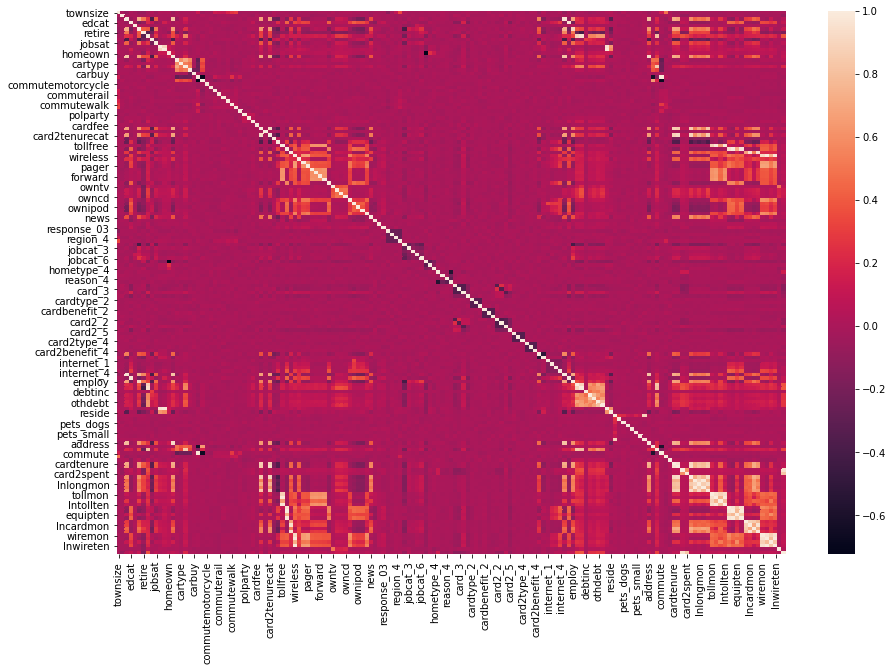

In [187]:
plt.figure(figsize = (15, 10))
sns.heatmap(credit_data_final.corr())
plt.show()

In [188]:
corr = credit_data_final.corr()
corr.to_csv(path + 'corr.csv')

In [189]:
corr

,townsize,gender,agecat,edcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polparty,polcontrib,vote,cardfee,cardtenurecat,card2fee,card2tenurecat,active,churn,tollfree,equip,callcard,wireless,multline,voice,pager,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,region_2,region_3,region_4,region_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,hometype_2,hometype_3,hometype_4,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend
townsize,1.000000,0.009017,-0.069325,0.003360,-0.019604,-0.058649,-0.066319,-0.007629,0.023844,-0.031534,0.029892,0.023276,0.023696,-0.043547,0.015866,-0.009315,0.001581,0.001683,0.008962,0.129619,-0.031248,-0.004727,-0.016423,0.131156,0.116688,0.100502,0.186949,0.261142,0.297582,-0.021326,-0.015116,-0.016270,-0.005416,-0.007362,-0.033292,-0.028643,-0.032257,0.022275,0.000569,0.000636,-0.006500,-0.024489,0.007659,0.004580,-0.007081,-0.004339,-0.004595,-0.011064,0.002835,0.003096,-0.008461,0.026432,-0.004670,0.016281,2.055894e-02,0.022389,0.002793,0.005308,0.007868,-0.001032,-0.028217,-0.006080,-0.009851,-0.007038,-0.122317,-0.014592,0.090858,0.334991,0.021205,-0.004550,-0.004566,-0.016309,-0.003005,-0.009665,0.002489,0.000119,0.006830,0.023602,0.006757,-0.006478,-0.013353,-3.914767e-03,0.015885,0.022347,0.006471,0.009358,-0.008760,-0.004950,0.026482,-1.562927e-02,-0.004241,0.002115,-0.002477,0.012243,-0.010066,-0.005515,0.008394,-0.019913,0.015735,0.015225,-0.051750,0.033210,-0.019555,-0.007290,-0.012357,0.021531,-0.075725,0.002542,-0.059574,-0.009697,0.000723,-0.019716,-0.039188,-0.031366,-0.014628,-0.003301,0.026064,0.044645,-0.001963,-0.019366,0.031187,-0.014221,0.009930,0.001767,0.020985,-0.007491,-0.042248,0.004212,0.002381,0.135395,0.486873,0.001197,-0.041675,-0.039651,-0.009179,-0.002923,-0.029460,-0.016751,-0.015240,-0.021471,-0.020643,-0.016172,-0.005016,-0.020379,-0.005680,0.001294,-0.004253,-0.007713,-0.007551,-0.014898,-0.022943,-0.016683,-0.028197,0.004690,0.006448,-0.006963,0.002844,-0.001675,-0.007583
gender,0.009017,1.000000,-0.007427,-0.002673,0.000311,-0.013842,-0.021040,-0.002149,-0.001620,0.001782,0.003888,-0.001918,0.006351,-0.006030,0.009135,0.013086,-0.002408,0.005597,0.011662,-0.011764,0.031083,-0.001775,0.003244,-0.028760,0.002292,-0.007104,0.013718,0.019405,0.005030,-0.006536,0.004640,-0.015294,-0.036284,0.018446,-0.006377,0.006799,-0.008150,0.021340,-0.013391,-0.010862,0.011702,-0.012769,-0.006170,-0.019839,-0.006053,-0.011541,-0.039693,-0.024920,-0.017734,-0.018902,0.020335,-0.000600,-0.003570,0.012181,-2.860503e-03,-0.001116,-0.006963,-0.021319,0.001164,0.009167,-0.020837,0.018058,0.001385,-0.009685,0.005929,0.000888,-0.017708,-0.000195,-0.001622,-0.011205,0.006426,-0.013430,-0.005198,-0.010878,0.001851,0.009316,-0.013875,0.023719,0.005920,-0.014886,0.038840,2.498876e-02,-0.007975,0.036232,-0.011082,-0.014776,-0.006943,-0.006436,0.000380,2.355650e-02,-0.001991,0.050082,-0.023455,0.020924,-0.008298,0.020262,0.005221,0.000580,-0.000576,0.005792

### DISTRIBUTION OF TARGET VARIABLE

<AxesSubplot:>

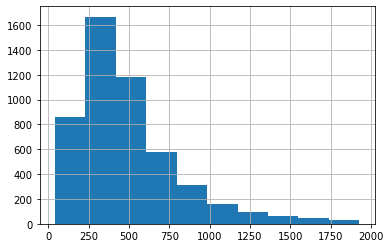

In [190]:
# DISTRIBUTION OF ORIGINAL TARGET VARIABLE
credit_data_final['total_spend'].hist()

<AxesSubplot:>

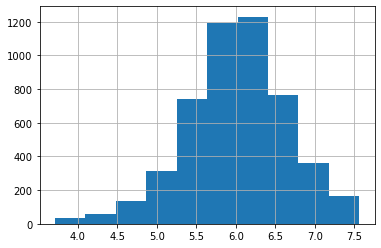

In [191]:
# DISTRIBUTION OF LOG TRANSFORMED TARGET VARIABLE
np.log(credit_data_final['total_spend']).hist()

<AxesSubplot:>

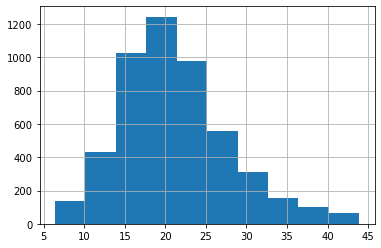

In [192]:
# DISTRIBUTION OF SQUARE ROOT TRANSFORMED TARGET VARIABLE
np.sqrt(credit_data_final['total_spend']).hist()

In [193]:
credit_data_final['total_spend'].skew(), np.log(credit_data_final['total_spend']).skew(), np.sqrt(credit_data_final['total_spend']).skew()

(1.5894956724921987, -0.33838713901193473, 0.6799968856443698)

In [194]:
# SINCE THE SKEWNESS OF LOG TRANSFORMED TARGET VARIABLE IS MINIMUM, WE WILL USE LOG TRANSFORMED TOTAL_SPEND FOR MODELLING
credit_data_final['ln_total_spend'] = np.log(credit_data_final['total_spend'])
credit_data_final.head()

,custid,townsize,gender,agecat,birthmonth,edcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecat,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polparty,polcontrib,vote,cardfee,cardtenurecat,card2fee,card2tenurecat,active,churn,tollfree,equip,callcard,wireless,multline,voice,pager,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,region_2,region_3,region_4,region_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,hometype_2,hometype_3,hometype_4,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,cardspent,card2spent,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend,ln_total_spend
0,3964-QJWTRG-NPN,2.0,1,2,September,3,1,1,0,2,1,1,0,-1,0,1,1,0,1,0,0,4,0,1,1,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,20,15,0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,2,14.3,8,22.0,6,2,3,81.66,67.80,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,0.000000,0.00,0.000000,13,149.46,5.007029
1,0648-AIPJSP-UVM,5.0,0,2,May,4,0,1,0,1,1,1,0,-1,1,1,1,1,1,0,0,1,1,0,0,1,0,0,1,0,1,1,1,0,0,0,2,0,2,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,22,17,0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,2,6.8,1,29.0,4,4,4,42.60,34.94,39,8.90,2.186051,330.60,5.800909,0.0,0.000000,0.00,0.000000,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,4.350794
2,5195-TLUDJE-HVO,4.0,1,6,June,2,0,5,0,2,0,4,1,2,1,5,1,1,1,0,1,3,1,0,1,1,1,0,0,0,0,0,1,0,0,0,5,0,5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,67,14,16,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,3,18.8,4,24.0,5,35,25,184.22,175.75,65,28.40,3.346389,1858.35,7.527444,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,23.00,3.135494,1410.0,7.251345,0.00,0.000000,0.00,0.000000,21,359.97,5.886021
3,4459-VLPQUH-3OL,3.0,0,2,May,3,0,1,0,1,1,2,1,4,1,2,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,23,16,0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,3,8.7,1,38.0,3,5,5,340.99,18.42,36,6.00,1.791759,199.45,5.295564,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,21.00,3.044522,685.0,6.529419,0.00,0.000000,0.00,0.000000,26,359.41,5.884464
4,8158-SMTQFB-CNO,2.0,0,3,July,3,0,1,0,1,0,1,1,2,0,2,0,1,1,0,1,3,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,3,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,26,16,1,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,1,10.6,6,32.0,4,8,9,255.10,252.73,21,3.05,1.115142,74.10,4.

In [195]:
# REMOVING IRRELEVANT VARIABLES FROM OUR DATA
credit_data_final.drop(columns = ['custid', 'birthmonth', 'commutecat', 'cardspent', 'card2spent'], inplace = True)

In [196]:
credit_data_final.shape

(5000, 157)

In [197]:
credit_data_final.head()

,townsize,gender,agecat,edcat,union,empcat,retire,inccat,default,jobsat,marital,spousedcat,homeown,addresscat,carown,cartype,carcatvalue,carbought,carbuy,commutecar,commutemotorcycle,commutecarpool,commutebus,commuterail,commutepublic,commutebike,commutewalk,commutenonmotor,telecommute,polparty,polcontrib,vote,cardfee,cardtenurecat,card2fee,card2tenurecat,active,churn,tollfree,equip,callcard,wireless,multline,voice,pager,callid,callwait,forward,confer,ebill,owntv,ownvcr,owndvd,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,region_2,region_3,region_4,region_5,jobcat_2,jobcat_3,jobcat_4,jobcat_5,jobcat_6,hometype_2,hometype_3,hometype_4,reason_2,reason_3,reason_4,reason_9,card_2,card_3,card_4,card_5,cardtype_2,cardtype_3,cardtype_4,cardbenefit_2,cardbenefit_3,cardbenefit_4,card2_2,card2_3,card2_4,card2_5,card2type_2,card2type_3,card2type_4,card2benefit_2,card2benefit_3,card2benefit_4,bfast_2,bfast_3,internet_1,internet_2,internet_3,internet_4,age,ed,employ,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,pets_saltfish,pets_freshfish,address,cars,carvalue,commute,commutetime,polview,cardtenure,card2tenure,tenure,longmon,lnlongmon,longten,lnlongten,tollmon,lntollmon,tollten,lntollten,equipmon,lnequipmon,equipten,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv,total_spend,ln_total_spend
0,2.0,1,2,3,1,1,0,2,1,1,0,-1,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,2,0,2,0,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,20,15,0,31.0,3.433987,11.1,1.200909,0.183079,2.240091,0.806516,-1,3,0,0,0,0,0,0,0,0,0,2,14.3,8,22.0,6,2,3,5,6.50,1.871802,34.40,3.538057,29.0,3.367296,161.05,5.081715,29.50,3.384390,126.1,4.837075,14.25,2.656757,60.0,4.094345,0.00,0.000000,0.00,0.000000,13,149.46,5.007029
1,5.0,0,2,4,0,1,0,1,1,1,0,-1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,0,2,0,2,1,0,0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,22,17,0,15.0,2.708050,18.6,1.222020,0.200505,1.567980,0.449788,-1,2,6,0,0,0,0,0,0,6,2,2,6.8,1,29.0,4,4,4,39,8.90,2.186051,330.60,5.800909,0.0,0.000000,0.00,0.000000,54.85,4.004602,1975.0,7.588324,16.00,2.772589,610.0,6.413459,45.65,3.821004,1683.55,7.428660,18,77.54,4.350794
2,4.0,1,6,2,0,5,0,2,0,4,1,2,1,5,1,1,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,5,0,5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,67,14,16,35.0,3.555348,9.9,0.928620,-0.074056,2.536380,0.930738,13,3,3,2,1,0,0,0,0,0,30,3,18.8,4,24.0,5,35,25,65,28.40,3.346389,1858.35,7.527444,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,23.00,3.135494,1410.0,7.251345,0.00,0.000000,0.00,0.000000,21,359.97,5.886021
3,3.0,0,2,3,0,1,0,1,1,2,1,4,1,2,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,23,16,0,20.0,2.995732,5.7,0.033160,-3.401690,1.117200,0.110826,18,5,0,0,0,0,0,0,0,0,3,3,8.7,1,38.0,3,5,5,36,6.00,1.791759,199.45,5.295564,0.0,0.000000,0.00,0.000000,0.00,0.000000,0.0,0.000000,21.00,3.044522,685.0,6.529419,0.00,0.000000,0.00,0.000000,26,359.41,5.884464
4,2.0,0,3,3,0,1,0,1,0,1,1,2,0,2,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,3,0,3,1,0,1,0,1,1,0,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,26,16,1,23.0,3.135494,1.7,0.214659,-1.538705,0.176341,-1.735336,13,4,0,0,0,0,0,0,0,0,3,1,10.6,6,32.0,4,8,9,21,3.05,1.115142,74.10,4.305416,16.5,2.803360,387.70,5.960232,0.00,0.000000,0.0,0.000000,17.25,2.847812,360.0,5.886104,19.05,2.947067,410.80,6.018106,27,507.83,6.230147


### APPLYING F-REGRESSION TO IDENTIFY SIGNIFICANT VARIABLES 

In [198]:
from sklearn.feature_selection import f_regression

feature_columns = credit_data_final.columns.difference(['total_spend', 'ln_total_spend'])

features = credit_data_final[feature_columns]
target   = credit_data_final['ln_total_spend']

f_values, p_values = f_regression(features, target)

f_regression_op = pd.DataFrame([feature_columns, f_values.round(2), p_values.round(4)]).T
f_regression_op.columns = ['Features', 'F_values', 'P_value']
feature_columns = list(f_regression_op.loc[f_regression_op['P_value'] < 0.05, 'Features'])

In [199]:
f_regression_op

,Features,F_values,P_value
0,active,0.1,0.7508
1,address,10.57,0.0012
2,addresscat,26.7,0
3,age,0.17,0.682
4,agecat,4.22,0.0399
5,bfast_2,7.51,0.0062
6,bfast_3,9.08,0.0026
7,callcard,2.04,0.1534
8,callid,15.12,0.0001
9,callwait,15.78,0.0001


In [200]:
print(feature_columns)

['address', 'addresscat', 'agecat', 'bfast_2', 'bfast_3', 'callid', 'callwait', 'carcatvalue', 'card2_2', 'card2_3', 'card2_4', 'card2_5', 'card2benefit_3', 'card2tenure', 'card2tenurecat', 'card_2', 'card_3', 'card_4', 'card_5', 'cardtenure', 'cardtenurecat', 'carown', 'carvalue', 'confer', 'creddebt', 'ebill', 'ed', 'edcat', 'empcat', 'employ', 'equip', 'equipmon', 'equipten', 'forward', 'gender', 'homeown', 'hometype_2', 'hourstv', 'inccat', 'income', 'internet_3', 'internet_4', 'jobcat_2', 'jobcat_3', 'jobsat', 'lncardten', 'lncreddebt', 'lnequipmon', 'lnequipten', 'lninc', 'lnlongmon', 'lnlongten', 'lnothdebt', 'lntollmon', 'lntollten', 'lnwiremon', 'lnwireten', 'longmon', 'longten', 'multline', 'news', 'othdebt', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib', 'reason_2', 'reason_4', 'region_5', 'response_03', 'retire', 'spoused', 'spousedcat', 'tenure', 'tollfree', 'tollmon', 'tollten', 'voice', 'vote', 'wireless', 

In [201]:
len(feature_columns)

89

In [202]:
feature_columns = ['addresscat', 'agecat', 'bfast_2', 'bfast_3', 'callid', 'callwait', 'card2_2', 'card2_3', 'card2_4', 'card2_5', 'card2benefit_3', 'card_2', 'card_3', 'card_4', 'card_5', 'carown', 'carvalue', 'confer', 'creddebt', 'ebill', 'edcat', 'employ', 'forward', 'gender', 'homeown', 'hometype_2', 'hourstv', 'lninc', 'inccat', 'internet_3', 'internet_4', 'jobcat_2', 'jobcat_3', 'jobsat', 'lncardten', 'lncreddebt', 'lnequipten', 'lnlongten', 'lnothdebt', 'longten', 'multline', 'news', 'othdebt', 'owncd', 'owndvd', 'ownfax', 'owngame', 'ownipod', 'ownpc', 'ownpda', 'owntv', 'ownvcr', 'pager', 'polcontrib', 'reason_2', 'reason_4', 'region_5', 'response_03', 'retire', 'spousedcat', 'tollfree', 'tollten', 'voice', 'vote', 'wireless', 'wireten']

### APPLYING VARIANCE INFLATION FACTOR TO REMOVE MULTICOLLINEARITY

In [203]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

model_param = 'ln_total_spend ~' + '+'.join(feature_columns)
y, X = dmatrices(model_param, credit_data_final, return_type = 'dataframe')
vif = pd.DataFrame()

vif['features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.round(1)

feature_columns = list(set(vif.loc[ : , 'features']).difference(['Intercept']))

In [204]:
vif

,features,VIF Factor
0,Intercept,289.793736
1,addresscat,3.949139
2,agecat,5.242704
3,bfast_2,2.019255
4,bfast_3,1.458538
5,callid,2.230728
6,callwait,2.182684
7,card2_2,2.106688
8,card2_3,2.181242
9,card2_4,2.303727


In [205]:
print(feature_columns)

['creddebt', 'forward', 'card_4', 'voice', 'lnothdebt', 'card2benefit_3', 'response_03', 'jobcat_2', 'edcat', 'jobcat_3', 'carown', 'card2_3', 'lninc', 'callwait', 'jobsat', 'ebill', 'vote', 'gender', 'card2_4', 'agecat', 'carvalue', 'wireless', 'owndvd', 'owntv', 'card2_2', 'lnlongten', 'wireten', 'othdebt', 'pager', 'ownipod', 'multline', 'confer', 'owngame', 'reason_2', 'internet_4', 'bfast_3', 'card_5', 'tollfree', 'hometype_2', 'retire', 'news', 'tollten', 'ownfax', 'inccat', 'ownpda', 'callid', 'lncreddebt', 'card2_5', 'addresscat', 'hourstv', 'ownpc', 'lnequipten', 'longten', 'bfast_2', 'ownvcr', 'reason_4', 'spousedcat', 'lncardten', 'region_5', 'homeown', 'employ', 'card_2', 'owncd', 'polcontrib', 'card_3', 'internet_3']


### SPLITTING THE DATA FOR TRAINING AND TESTING

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
credit_data_train, credit_data_test = train_test_split(credit_data_final, test_size = 0.3, random_state = 12345)

In [208]:
credit_data_train.shape, credit_data_test.shape

((3500, 157), (1500, 157))

In [209]:
# FEATURES TO BE USED FOR MODEL BUILDING
model_param = ['carown', 'jobcat_2', 'news', 'creddebt', 'lninc', 'spousedcat', 'gender', 'lnequipten', 'addresscat', 'lncreddebt', 'wireless', 'edcat', 'card2_4', 'lnothdebt', 'card_5', 'card_3', 'carvalue', 'response_03', 'bfast_2', 'ownpc', 'othdebt', 'internet_4', 'confer', 'card2_5', 'card_2', 'hourstv', 'longten', 'hometype_2', 'lnlongten', 'jobcat_3', 'ownipod', 'owngame', 'callwait', 'retire', 'internet_3', 'ownpda', 'reason_4', 'ownfax', 'bfast_3', 'lncardten', 'employ', 'vote', 'card2benefit_3', 'card_4', 'owndvd', 'agecat', 'jobsat', 'wireten', 'polcontrib', 'region_5', 'multline', 'pager', 'reason_2', 'owntv', 'owncd', 'voice', 'homeown', 'callid', 'inccat', 'card2_3', 'ownvcr', 'tollfree', 'card2_2', 'forward', 'ebill', 'tollten']
print(model_param)

['carown', 'jobcat_2', 'news', 'creddebt', 'lninc', 'spousedcat', 'gender', 'lnequipten', 'addresscat', 'lncreddebt', 'wireless', 'edcat', 'card2_4', 'lnothdebt', 'card_5', 'card_3', 'carvalue', 'response_03', 'bfast_2', 'ownpc', 'othdebt', 'internet_4', 'confer', 'card2_5', 'card_2', 'hourstv', 'longten', 'hometype_2', 'lnlongten', 'jobcat_3', 'ownipod', 'owngame', 'callwait', 'retire', 'internet_3', 'ownpda', 'reason_4', 'ownfax', 'bfast_3', 'lncardten', 'employ', 'vote', 'card2benefit_3', 'card_4', 'owndvd', 'agecat', 'jobsat', 'wireten', 'polcontrib', 'region_5', 'multline', 'pager', 'reason_2', 'owntv', 'owncd', 'voice', 'homeown', 'callid', 'inccat', 'card2_3', 'ownvcr', 'tollfree', 'card2_2', 'forward', 'ebill', 'tollten']


In [210]:
# MODEL EQUATION
model_eqn = 'ln_total_spend ~ ' + ' + '.join(model_param)
model_eqn

'ln_total_spend ~ carown + jobcat_2 + news + creddebt + lninc + spousedcat + gender + lnequipten + addresscat + lncreddebt + wireless + edcat + card2_4 + lnothdebt + card_5 + card_3 + carvalue + response_03 + bfast_2 + ownpc + othdebt + internet_4 + confer + card2_5 + card_2 + hourstv + longten + hometype_2 + lnlongten + jobcat_3 + ownipod + owngame + callwait + retire + internet_3 + ownpda + reason_4 + ownfax + bfast_3 + lncardten + employ + vote + card2benefit_3 + card_4 + owndvd + agecat + jobsat + wireten + polcontrib + region_5 + multline + pager + reason_2 + owntv + owncd + voice + homeown + callid + inccat + card2_3 + ownvcr + tollfree + card2_2 + forward + ebill + tollten'

### BUILDING THE MODEL

In [211]:
import statsmodels.formula.api as smf

In [212]:
model0 = smf.ols(model_eqn, credit_data_train).fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     29.49
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.86e-281
Time:                        21:59:29   Log-Likelihood:                -2646.7
No. Observations:                3500   AIC:                             5427.
Df Residuals:                    3433   BIC:                             5840.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6936      0.147     38.

In [213]:
# FEATURES TO BE USED FOR MODEL BUILDING
model_param = list(set(model_param).difference(['news', 'spousedcat', 'othdebt', 'wireten', 'ownvcr']))
print(model_param)

['creddebt', 'forward', 'card_4', 'voice', 'lnothdebt', 'card2benefit_3', 'response_03', 'jobcat_2', 'edcat', 'jobcat_3', 'carown', 'lninc', 'card2_3', 'callwait', 'jobsat', 'vote', 'ebill', 'gender', 'card2_4', 'agecat', 'wireless', 'carvalue', 'owndvd', 'owntv', 'card2_2', 'lnlongten', 'pager', 'ownipod', 'multline', 'confer', 'owngame', 'reason_2', 'internet_4', 'bfast_3', 'card_5', 'tollfree', 'hometype_2', 'retire', 'tollten', 'ownfax', 'inccat', 'ownpda', 'callid', 'lncreddebt', 'card2_5', 'addresscat', 'hourstv', 'ownpc', 'lnequipten', 'longten', 'bfast_2', 'reason_4', 'lncardten', 'region_5', 'owncd', 'employ', 'card_2', 'polcontrib', 'homeown', 'card_3', 'internet_3']


In [214]:
# MODEL EQUATION
model_eqn = 'ln_total_spend ~ ' + ' + '.join(model_param)
model_eqn

'ln_total_spend ~ creddebt + forward + card_4 + voice + lnothdebt + card2benefit_3 + response_03 + jobcat_2 + edcat + jobcat_3 + carown + lninc + card2_3 + callwait + jobsat + vote + ebill + gender + card2_4 + agecat + wireless + carvalue + owndvd + owntv + card2_2 + lnlongten + pager + ownipod + multline + confer + owngame + reason_2 + internet_4 + bfast_3 + card_5 + tollfree + hometype_2 + retire + tollten + ownfax + inccat + ownpda + callid + lncreddebt + card2_5 + addresscat + hourstv + ownpc + lnequipten + longten + bfast_2 + reason_4 + lncardten + region_5 + owncd + employ + card_2 + polcontrib + homeown + card_3 + internet_3'

In [215]:
# BUILDING MODEL 1 AFTER REMOVING FEATURES HAVING P-VALUE > 0.9
model1 = smf.ols(model_eqn, credit_data_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     31.96
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          3.44e-285
Time:                        21:59:29   Log-Likelihood:                -2646.7
No. Observations:                3500   AIC:                             5417.
Df Residuals:                    3438   BIC:                             5799.
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6940      0.146     39.

In [216]:
# FEATURES TO BE USED FOR MODEL BUILDING
model_param = list(set(model_param).difference(['carown', 'jobcat_2', 'employ', 'lncreddebt', 'bfast_2', 'confer', 'homeown', 'callid', 'inccat', 'lnlongten', 'ownipod', 'bfast_3']))
print(model_param)

['creddebt', 'reason_2', 'internet_4', 'forward', 'card_4', 'card_5', 'tollfree', 'hometype_2', 'voice', 'lnothdebt', 'card_3', 'retire', 'card2benefit_3', 'tollten', 'ownfax', 'response_03', 'edcat', 'jobcat_3', 'ownpda', 'lninc', 'card2_3', 'card2_5', 'addresscat', 'hourstv', 'ownpc', 'lnequipten', 'longten', 'jobsat', 'callwait', 'ebill', 'vote', 'gender', 'card2_4', 'agecat', 'reason_4', 'wireless', 'carvalue', 'lncardten', 'region_5', 'owndvd', 'owntv', 'card2_2', 'owncd', 'card_2', 'polcontrib', 'internet_3', 'pager', 'multline', 'owngame']


In [217]:
# MODEL EQUATION
model_eqn = 'ln_total_spend ~ ' + ' + '.join(model_param)
model_eqn

'ln_total_spend ~ creddebt + reason_2 + internet_4 + forward + card_4 + card_5 + tollfree + hometype_2 + voice + lnothdebt + card_3 + retire + card2benefit_3 + tollten + ownfax + response_03 + edcat + jobcat_3 + ownpda + lninc + card2_3 + card2_5 + addresscat + hourstv + ownpc + lnequipten + longten + jobsat + callwait + ebill + vote + gender + card2_4 + agecat + reason_4 + wireless + carvalue + lncardten + region_5 + owndvd + owntv + card2_2 + owncd + card_2 + polcontrib + internet_3 + pager + multline + owngame'

In [218]:
# BUILDING MODEL 2 AFTER REMOVING FEATURES HAVING P-VALUE > 0.7
model2 = smf.ols(model_eqn, credit_data_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     39.88
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          2.75e-294
Time:                        21:59:29   Log-Likelihood:                -2647.4
No. Observations:                3500   AIC:                             5395.
Df Residuals:                    3450   BIC:                             5703.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7391      0.108     53.

In [219]:
# FEATURES TO BE USED FOR MODEL BUILDING
model_param = list(set(model_param).difference(['lnequipten', 'vote', 'addresscat', 'wireless', 'polcontrib', 'owncd', 'longten', 'voice', 'hometype_2', 'tollfree', 'jobcat_3', 'owngame', 'forward', 'callwait', 'ownpda', 'tollten', 'lncardten']))
print(model_param)

['creddebt', 'reason_2', 'internet_4', 'card_4', 'card_5', 'lnothdebt', 'retire', 'card2benefit_3', 'ownfax', 'response_03', 'edcat', 'lninc', 'card2_3', 'card2_5', 'hourstv', 'ownpc', 'jobsat', 'ebill', 'gender', 'card2_4', 'agecat', 'reason_4', 'carvalue', 'region_5', 'owndvd', 'owntv', 'card2_2', 'card_2', 'card_3', 'internet_3', 'pager', 'multline']


In [220]:
# MODEL EQUATION
model_eqn = 'ln_total_spend ~ ' + ' + '.join(model_param)
model_eqn

'ln_total_spend ~ creddebt + reason_2 + internet_4 + card_4 + card_5 + lnothdebt + retire + card2benefit_3 + ownfax + response_03 + edcat + lninc + card2_3 + card2_5 + hourstv + ownpc + jobsat + ebill + gender + card2_4 + agecat + reason_4 + carvalue + region_5 + owndvd + owntv + card2_2 + card_2 + card_3 + internet_3 + pager + multline'

In [221]:
# BUILDING MODEL 3 AFTER REMOVING FEATURES HAVING P-VALUE > 0.4
model3 = smf.ols(model_eqn, credit_data_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     60.93
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          8.00e-307
Time:                        21:59:29   Log-Likelihood:                -2651.9
No. Observations:                3500   AIC:                             5370.
Df Residuals:                    3467   BIC:                             5573.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7314      0.105     54.

In [222]:
# FEATURES TO BE USED FOR MODEL BUILDING
model_param = list(set(model_param).difference(['creddebt', 'owndvd', '', 'multline', 'pager', 'owntv', 'retire', 'ownfax']))
print(model_param)

['reason_2', 'internet_4', 'card_4', 'card_5', 'lnothdebt', 'card2benefit_3', 'response_03', 'edcat', 'lninc', 'card2_3', 'card2_5', 'hourstv', 'ownpc', 'jobsat', 'ebill', 'gender', 'card2_4', 'agecat', 'reason_4', 'carvalue', 'region_5', 'card2_2', 'card_2', 'card_3', 'internet_3']


In [223]:
# MODEL EQUATION
model_eqn = 'ln_total_spend ~ ' + ' + '.join(model_param)
model_eqn

'ln_total_spend ~ reason_2 + internet_4 + card_4 + card_5 + lnothdebt + card2benefit_3 + response_03 + edcat + lninc + card2_3 + card2_5 + hourstv + ownpc + jobsat + ebill + gender + card2_4 + agecat + reason_4 + carvalue + region_5 + card2_2 + card_2 + card_3 + internet_3'

In [224]:
# BUILDING MODEL 4 AFTER REMOVING FEATURES HAVING P-VALUE > 0.1
model4 = smf.ols(model_eqn, credit_data_train).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     77.83
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          3.45e-312
Time:                        21:59:29   Log-Likelihood:                -2654.5
No. Observations:                3500   AIC:                             5361.
Df Residuals:                    3474   BIC:                             5521.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.7105      0.090     63.

In [225]:
# FEATURES TO BE USED FOR MODEL BUILDING
model_param = list(set(model_param).difference(['jobsat', 'carvalue', 'response_03', 'ownpc', 'hourstv']))
print(model_param)

['card2_5', 'reason_2', 'internet_4', 'card_4', 'card_5', 'ebill', 'lnothdebt', 'gender', 'card2benefit_3', 'card2_4', 'agecat', 'reason_4', 'edcat', 'region_5', 'lninc', 'card2_3', 'card2_2', 'card_2', 'card_3', 'internet_3']


In [226]:
# MODEL EQUATION
model_eqn = 'ln_total_spend ~ ' + ' + '.join(model_param)
model_eqn

'ln_total_spend ~ card2_5 + reason_2 + internet_4 + card_4 + card_5 + ebill + lnothdebt + gender + card2benefit_3 + card2_4 + agecat + reason_4 + edcat + region_5 + lninc + card2_3 + card2_2 + card_2 + card_3 + internet_3'

### FINAL MODEL

In [227]:
# BUILDING MODEL 5 AFTER REMOVING FEATURES HAVING P-VALUE > 0.1
model5 = smf.ols(model_eqn, credit_data_train).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:         ln_total_spend   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     96.55
Date:                Sat, 05 Jun 2021   Prob (F-statistic):          1.13e-314
Time:                        21:59:29   Log-Likelihood:                -2660.1
No. Observations:                3500   AIC:                             5362.
Df Residuals:                    3479   BIC:                             5492.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.8354      0.072     81.

### CHECKING THE DISTRIBUTION OF RESIDUALS

In [228]:
model5.resid.mean(), model5.resid.skew()

(2.098131192594467e-15, -0.41516491897589775)

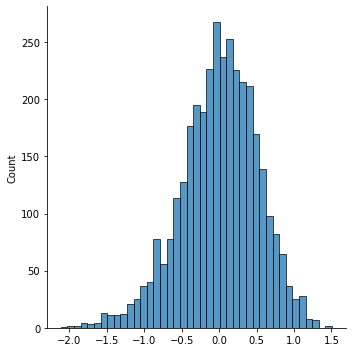

In [229]:
sns.displot(model5.resid)
plt.show()

In [230]:
# SINCE THE MEAN OF RESIDUALS IS VERY CLOSE TO ZERO AND ALSO FOLLOWS A NORMAL DISTRIBUTION, HENCE WE CAN PROCEED WITH 
# THIS MODEL FOR FURTHER PROCESSING.

### APPLYING THE MODEL ON TRAINING DATASET

In [245]:
credit_data_train.loc[ :, ['total_spend_pred']] = np.exp(model5.predict(credit_data_train))

### APPLYING THE MODEL ON TESTING DATASET

In [232]:
credit_data_test.loc[ :, ['total_spend_pred']] = np.exp(model5.predict(credit_data_test))

### MODEL EVALUATION METRICS

#### CORRELATION MATRIX

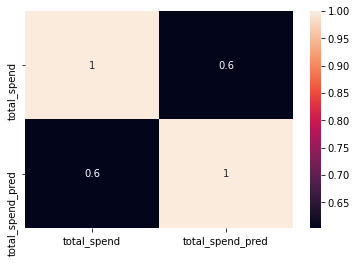

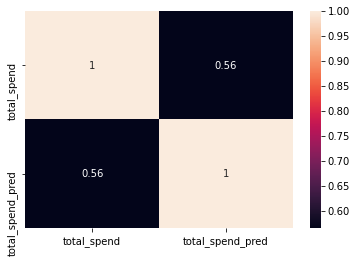

In [233]:
sns.heatmap(credit_data_train[['total_spend', 'total_spend_pred']].corr(), annot = True)
plt.show()
sns.heatmap(credit_data_test[['total_spend', 'total_spend_pred']].corr(), annot = True)
plt.show()

In [234]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

#### MEAN ABSOLUTE ERROR

In [235]:
MAE_train = round(mean_absolute_error(credit_data_train['total_spend'], credit_data_train['total_spend_pred']), 4)
MAE_test = round(mean_absolute_error(credit_data_test['total_spend'], credit_data_test['total_spend_pred']), 4)

print('MAE FOR TRAINING SET : ',  MAE_train , ' | MAE FOR TESTING SET : ', MAE_test)

MAE FOR TRAINING SET :  184.707  | MAE FOR TESTING SET :  188.1059


#### MEAN SQUARED ERROR

In [236]:
MSE_train = round(mean_squared_error(credit_data_train['total_spend'], credit_data_train['total_spend_pred']), 4)
MSE_test = round(mean_squared_error(credit_data_test['total_spend'], credit_data_test['total_spend_pred']), 4)

print('MSE FOR TRAINING SET : ',  MSE_train , ' | MSE FOR TESTING SET : ', MSE_test)

MSE FOR TRAINING SET :  69466.7515  | MSE FOR TESTING SET :  68166.9147


#### ROOT MEAN SQUARED ERROR

In [237]:
RMSE_train = round(np.sqrt(MSE_train), 4)
RMSE_test = round(np.sqrt(MSE_test), 4)

print('RMSE FOR TRAINING SET : ',  RMSE_train , ' | RMSE FOR TESTING SET : ', RMSE_test)

RMSE FOR TRAINING SET :  263.5655  | RMSE FOR TESTING SET :  261.0879


#### MEAN ABSOLUTE PERCENTAGE ERROR

In [243]:
MAPE_train = np.mean(np.abs(credit_data_train['total_spend'] - credit_data_train['total_spend_pred'])/credit_data_train['total_spend'])
MAPE_test  = np.mean(np.abs(credit_data_test['total_spend'] - credit_data_test['total_spend_pred'])/credit_data_test['total_spend'])

print('MAPE FOR TRAINING SET : ',  round(MAPE_train*100, 4) , ' | MAPE FOR TESTING SET : ', round(MAPE_test*100, 4))

MAPE FOR TRAINING SET :  46.6306  | MAPE FOR TESTING SET :  49.1369


#### DECILE ANALYSIS

In [239]:
credit_data_train.loc[ :, 'decile'] = pd.qcut(credit_data_train.loc[ :, 'total_spend_pred'], q = 10, labels = False)
credit_data_train.loc[ :, 'decile_count'] = pd.qcut(credit_data_train.loc[ :, 'total_spend_pred'], q = 10, labels = False)
credit_data_test.loc[ :, 'decile']  = pd.qcut(credit_data_test.loc[ :, 'total_spend_pred'], q = 10, labels = False)
credit_data_test.loc[ :, 'decile_count'] = pd.qcut(credit_data_test.loc[ :, 'total_spend_pred'], q = 10, labels = False)

C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\shubh\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [240]:
decile_analysis_train = credit_data_train.groupby('decile')[['decile_count', 'total_spend', 'total_spend_pred']].agg({'decile_count' : 'count', 'total_spend' : 'mean', 'total_spend_pred' : 'mean'}).reset_index()
decile_analysis_train.to_csv(path + 'decile_analysis_train.csv')
decile_analysis_train

,decile,decile_count,total_spend,total_spend_pred
0,0,350,260.321573,227.929260
1,1,350,319.197337,275.959990
2,2,350,352.484166,304.641169
3,3,350,376.613986,333.768331
4,4,350,423.825369,367.935559
5,5,350,467.517845,411.327295
6,6,350,535.733575,467.710973
7,7,350,583.591867,535.549624
8,8,350,730.520070,629.874514
9,9,350,910.210644,852.133165


In [241]:
decile_analysis_test = credit_data_test.groupby('decile')[['decile_count', 'total_spend', 'total_spend_pred']].agg({'decile_count' : 'count', 'total_spend' : 'mean', 'total_spend_pred' : 'mean'}).reset_index()
decile_analysis_test.to_csv(path + 'decile_analysis_test.csv')
decile_analysis_test

,decile,decile_count,total_spend,total_spend_pred
0,0,150,272.055303,226.591463
1,1,150,309.003390,278.757576
2,2,150,363.800257,306.129838
3,3,150,386.118133,332.685705
4,4,150,408.716267,368.150980
5,5,150,482.539181,410.136137
6,6,150,522.750779,460.940809
7,7,150,571.829999,527.224888
8,8,150,635.128780,619.385259
9,9,150,882.219336,831.379744
